##Challenge evasión de Clientes, parte 2

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.



###importación de biblioteca

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

#**Extracción del archivo tratado**

In [2]:
pd.read_csv('df_limpo.csv')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [3]:
df= pd.read_csv('df_limpo.csv')

In [4]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [5]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

#**Tratamiento de los datos**

Quitar columnas que no son relevantes, como el 'customerID'

In [7]:
df = df.drop(columns=['customerID'])

Transformar datos categoricos en 0,1 y -1 (los datos transformados seran yes y No ) , para minimizar datos redundantes, que no afectara en el modelo

In [8]:
df_clean= df.copy()

In [9]:
cols_to_fix = ['internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection',
               'internet.TechSupport','internet.StreamingTV', 'internet.StreamingMovies' ]

In [10]:
for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

Creación de variable, en donde recibira todas las variables categoricas.

In [11]:
categoricas_cols = ['Churn','customer.gender','customer.Partner','customer.Dependents',
                   'phone.PhoneService','phone.MultipleLines','internet.InternetService',
                   'internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection',
                   'internet.TechSupport','internet.StreamingTV','internet.StreamingMovies',
                   'account.Contract','account.PaperlessBilling','account.PaymentMethod']

In [12]:
df.head(5)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


#**Encoding**



El one-hot encoding es una técnica para transformar datos categóricos en un formato numérico que las máquinas puedan entender y utilizar, especialmente en el aprendizaje automático.

¿Cómo funciona? 1.Identificación de categorías: Se identifican todas las categorías únicas presentes en la variable categórica original.

2.Creación de nuevas columnas: Se crea una nueva columna binaria para cada categoría única.

3.Asignación de valores: Para cada fila, se asigna un 1 a la columna correspondiente a la categoría presente en esa fila, y un 0 a todas las demás columnas.

creacion de nueva varible, llamada columnas categoricas, seleccionando el df, el cual selecciona todas las columnas de tipo objeto, haciendo despues un encoding en estas variables

In [13]:
df_encoded = pd.get_dummies(df_clean, columns=categoricas_cols, drop_first=True)

In [14]:
df_encoded.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

In [16]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


**Para verificar los datos nulos y posterior removerlos.**

In [17]:
print(df_encoded[['Total.Day','account.Charges.Total']].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


In [18]:
df_encoded = df_encoded.dropna(subset=['Total.Day','account.Charges.Total'])

In [19]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


####Tratamiento de valores nulos

Al identificar valores nulos en las columnas Total.Day y account.Charges.Total, es necesario decidir entre eliminar o rellenar esas entradas.

Eliminar filas: como el número de valores nulos es pequeño (11 filas en más de 7 mil), podemos eliminar esas filas sin afectar el análisis. Esto evita introducir distorsiones en los resultados.

Reemplazar por cero: esta opción puede usarse cuando el valor nulo representa ausencia de dato o servicio (por ejemplo, ninguna cobranza), pero puede distorsionar promedios y sumas si no es el caso real.

En este proyecto, optamos por eliminar las filas con valores nulos por seguridad y simplicidad, asegurando que los datos usados estén completos.

#Correlacion entre las variables

In [20]:
corr = df_encoded.corr()

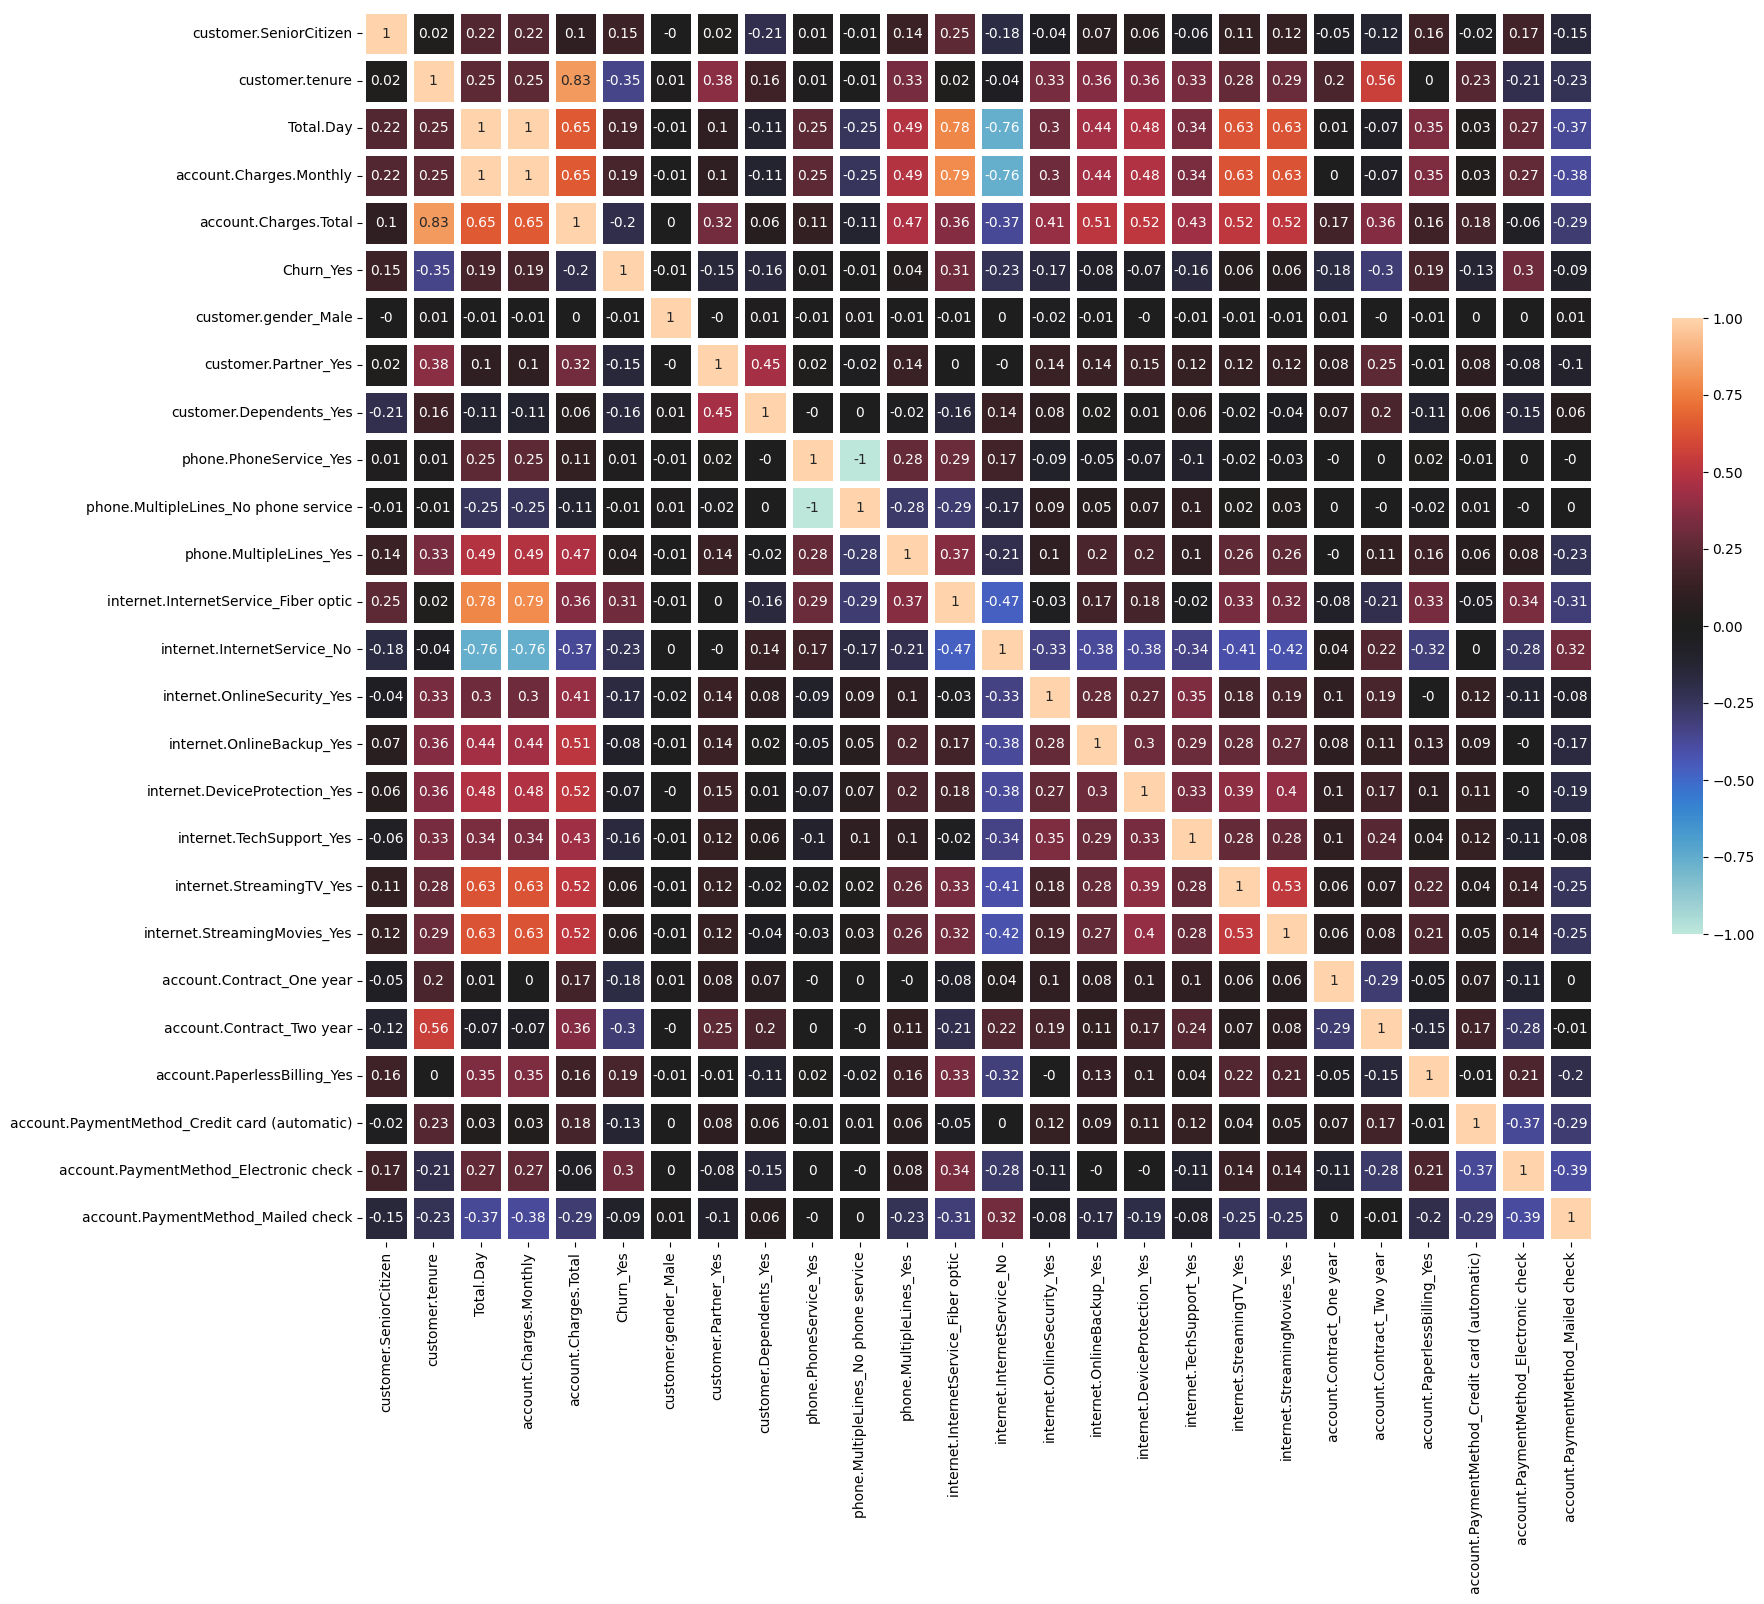

In [21]:
fig, ax= plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr,2), vmax=1, vmin=-1,center=0,
                 square=True, linewidths=5,annot=True,cbar_kws={'shrink':.5})

plt.show()

###Aplicación mascara

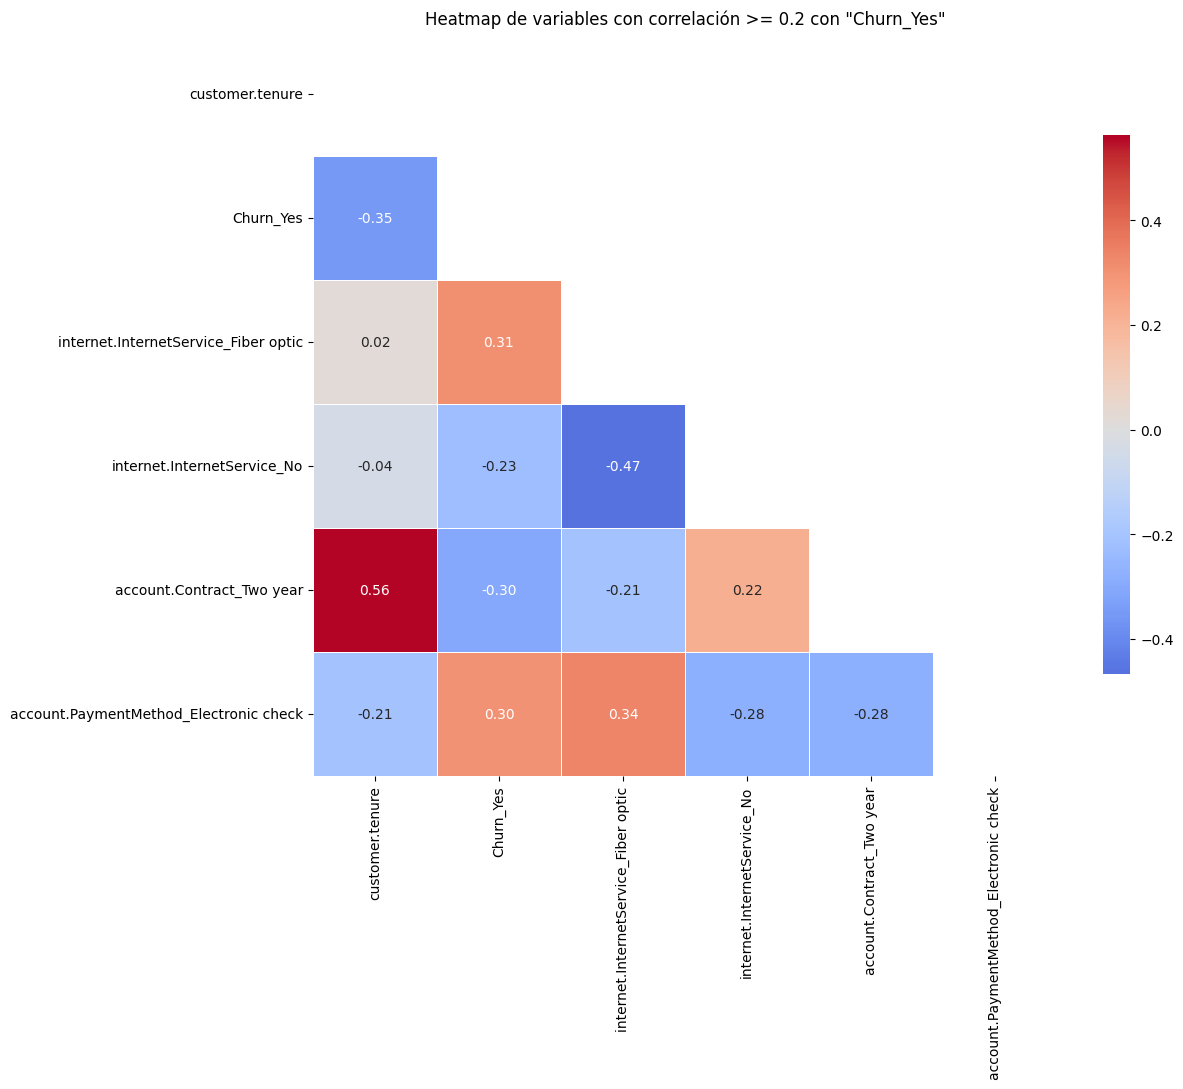

In [22]:

# Definir la variable objetivo
target_var = 'Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limite = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = corr.index[abs(corr[target_var]) >= limite].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variables_relevantes:
    variables_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limite} con "{target_var}"')
plt.show()



####Analizar un heatmap de correlación grande, se usan dos técnicas:

Umbral de correlación: Se filtra el gráfico para mostrar solo las variables que tienen una correlación fuerte (por encima de un valor, como 0.3) con la variable objetivo (Evasión). Esto reduce el número de variables y enfoca el análisis en las relaciones más importantes.

Máscara del triángulo superior: Como la matriz de correlación es simétrica, se oculta la mitad superior del gráfico. Esto elimina la información duplicada, haciendo la visualización más limpia y fácil de leer.

Estas técnicas combinadas hacen que un gráfico complejo sea más legible y útil para identificar rápidamente las variables clave.

###Explicación del uso del umbral y de la máscara en el heatmap de correlación

Variables de Churn: El churn se asocia positivamente con el servicio de fibra óptica y el pago con cheque electrónico. Se asocia negativamente (menos churn) con contratos de 2 años y una mayor antigüedad del cliente.

Multicolinealidad (VIF): El VIF es una herramienta para detectar la multicolinealidad, un problema que afecta a los modelos lineales (como la regresión logística). Sin embargo, no es un problema para los modelos no lineales como Random Forest o XGBoost. Se debe usar el VIF si se necesita interpretar los coeficientes del modelo. Según tu análisis, no se detectó una multicolinealidad grave.

####Regresión Logisticas, Calculo VIF

In [23]:
# Aquí, no incluyas la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
X = df_encoded.drop(columns=['Churn_Yes'])

In [24]:
#Añadir constante
X_const = add_constant(X)

In [25]:
#Calculo VIF
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


####Analisis VIF
El VIF mide la multicolinealidad entre variables. Un VIF bajo (cercano a 1) es ideal, mientras que un VIF alto (mayor a 5 o 10) indica un problema.

1.- La principal alerta es un VIF infinito entre las variables phone.PhoneService_Yes y phone.MultipleLines_No phone service. Esto indica una multicolinealidad perfecta porque ambas variables están intrínsecamente relacionadas, probablemente por un error en la codificación de una variable categórica original.

La solución recomendada es eliminar una de las dos variables para resolver el problema.

2.- El VIF extremadamente alto (813.86) para la variable account.Charges.Monthly indica una multicolinealidad severa. La causa probable es que esta variable está altamente correlacionada con otras variables de cobro (account.Charges.Total y Total.Day), que probablemente contienen información redundante. La solución es eliminar una o dos de estas columnas para corregir el problema.

3.- El análisis VIF detecta varios casos de multicolinealidad severa, como en las variables de servicio de internet (InternetService_Fiber optic y InternetService_No), las de streaming (StreamingTV y StreamingMovies) y la de cobros totales (Charges.Total). Estas variables están muy correlacionadas entre sí.

La solución es eliminar variables redundantes o usar técnicas de codificación diferentes (drop_first=True) para simplificar el modelo y evitar la inestabilidad.

####Reformulación VIF

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para não modificar o original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variáveis com multicolinearidade perfeita (VIF = inf) ======
cols_to_drop = [
    "phone.PhoneService_Yes",               # Altamente colinear com "MultipleLines"
    "phone.MultipleLines_No phone service"  # Redundante com ausência de telefone
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundâncias fortes entre variáveis numéricas ======
# Se 'Total.Day' e 'Charges.Total' são derivados de 'Monthly' e 'tenure', mantemos só um
X_filtered.drop(columns=["Total.Day"], inplace=True)

# ====== Etapa 4: Remover redundância entre dummies da mesma variável categórica ======
# Se usou get_dummies sem drop_first, você tem dummies redundantes para InternetService
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


La reformulación  muestra que la multicolinealidad crítica se ha resuelto. La mayoría de las variables tienen VIFs aceptables.

Sin embargo, account.Charges.Monthly y account.Charges.Total aún presentan una alta multicolinealidad. Si se utilizan modelos no lineales (como árboles de decisión), este problema puede ignorarse, ya que no afectan la precisión de estos modelos. Si se necesita interpretar los coeficientes de un modelo lineal, se debe considerar ajustar estas variables.

###Modelos Predictivos

**Separar features y targets**

In [27]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

**Entrenamiento y prueba**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


###**Normalización**

Vamos a entrenar Regresión Logística, que se beneficia de la normalización. Por eso, normalizamos los datos para este modelo.

En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Balanceo de entrenamiento

Será  SMOTE , Porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.

In [30]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

###Regresión Logística

In [31]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regresión Logística
Exactitud: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusión:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



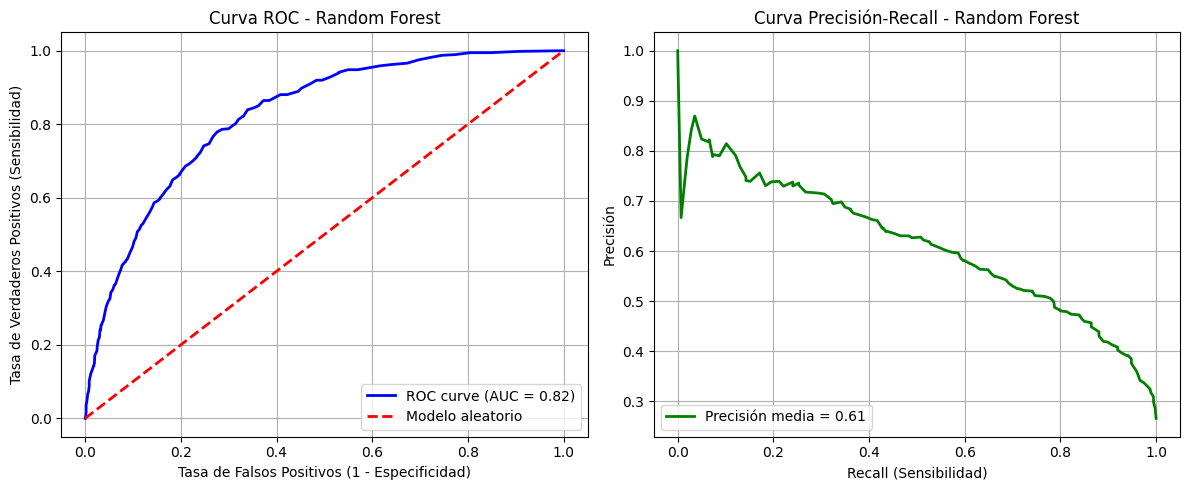

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# ====== 1. Curva ROC ======
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

# Subplot 1 - ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Modelo aleatorio')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)

# ====== 2. Curva Precisión-Recall ======
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)
avg_precision = average_precision_score(y_test, y_prob_rf)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'Precisión media = {avg_precision:.2f}')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall - Random Forest')
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.show()


###Análisis ROC Y RECALL

📊 Curva ROC: El modelo Random Forest presenta un AUC alto (cercano a 1), lo que indica una muy buena capacidad para diferenciar entre clientes que cancelan y los que permanecen. La curva se aleja claramente de la diagonal aleatoria, señal de un rendimiento sólido.


📊 Curva Precisión-Recall: La precisión se mantiene elevada incluso cuando el recall es alto, lo que significa que el modelo detecta correctamente a la mayoría de los clientes que cancelan sin aumentar mucho los falsos positivos. Esto es especialmente relevante en escenarios con desbalanceo de clases.




**📌 Conclusión: El modelo está bien calibrado y generaliza de forma efectiva. Gracias al balanceo previo de datos, se logró mejorar la detección de la clase minoritaria (cancelaciones) manteniendo un buen equilibrio entre sensibilidad y precisión.**

**Conclusión análisis**


Rendimiento general: El modelo tiene una precisión del 75% y un buen valor de ROC AUC del 84.5%, lo que indica que es bastante bueno para distinguir entre los clientes que se van y los que se quedan.

Fortalezas: El modelo es muy efectivo identificando a los clientes que se van (una sensibilidad del 81% para la clase 'True'). Es decir, encuentra la mayoría de los casos de "churn".

Debilidades: La precisión es baja (52%) para la clase 'True'. Esto significa que, de todos los clientes que el modelo predice que se van, solo la mitad realmente lo hace.

###Random Forest

In [32]:

# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest
Exactitud: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusión:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



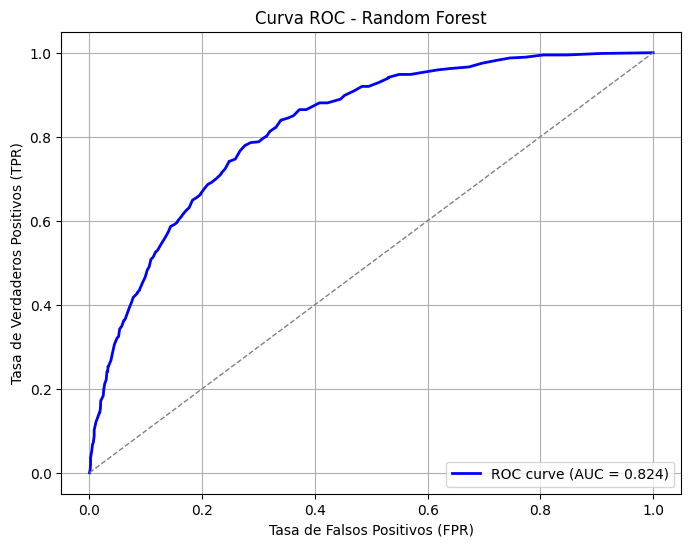

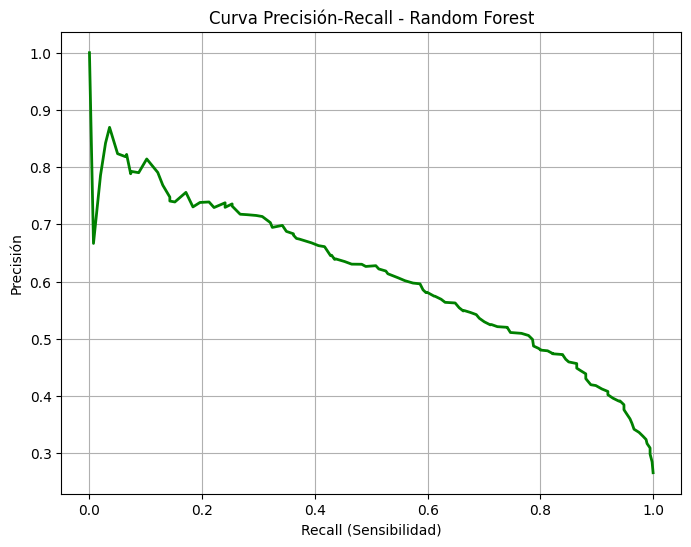

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Calcular los puntos para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# ---- OPCIONAL: Curva Precision-Recall ----
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall - Random Forest')
plt.grid(True)
plt.show()


###Curva ROC Y RECALL

📊 Curva ROC

El AUC (Área Bajo la Curva) cercano a 1 indica que el modelo distingue muy bien entre clientes que cancelan y los que permanecen.

Una curva que se eleva rápidamente hacia la esquina superior izquierda muestra alta sensibilidad y alta especificidad.

Si el AUC está > 0.85, el modelo tiene un excelente poder discriminativo; si está entre 0.7 y 0.85, es bueno; y si < 0.7, requiere mejora.

📊 Curva Precisión-Recall

Si la curva se mantiene alta y lejos de la línea base, significa que el modelo detecta bien la clase minoritaria (clientes que cancelan) con poca pérdida de precisión.

Es especialmente útil en tu caso si había desbalanceo en la variable Churn, porque esta curva evalúa mejor que la ROC el rendimiento en la clase menos frecuente.

Una caída rápida de precisión a medida que aumenta el recall indica que el modelo necesita ajustes o mejor balanceo.

**Conclusion análisis del modelo Random Forest**

Rendimiento general: El modelo tiene una precisión del 78% y un valor de ROC AUC de 82.4%. Aunque el ROC AUC es ligeramente inferior al de la regresión logística, la exactitud es mayor.

Matriz de confusión y métricas:

Clase 'False' (no churn): El modelo es muy preciso y sensible (ambos alrededor del 85%), lo que significa que es excelente para identificar a los clientes que se quedan.

Clase 'True' (churn): El modelo tiene una precisión (58%) y sensibilidad (60%) moderadas. Aunque es mejor que la regresión logística en precisión para esta clase, su capacidad para encontrar a los clientes que se van (sensibilidad/recall) es menor.

En resumen, este modelo de Random Forest es más equilibrado en su rendimiento para ambas clases que la regresión logística, siendo más confiable para predecir a los clientes que se quedan, pero menos efectivo identificando a los que se van.